In [26]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
from PIL import Image
import torch
import os

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [28]:
# Load the model and processor from the saved directory
model = Blip2ForConditionalGeneration.from_pretrained("./blip200", device_map="auto")
processor = AutoProcessor.from_pretrained("./blip200")

# model.to(device)
model.eval()
print("Model and processor loaded successfully.")

Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.00it/s]


Model and processor loaded successfully.


In [29]:
image = Image.open("./test_set_blip/Azymol D BMT49_1-3  pXX.png")

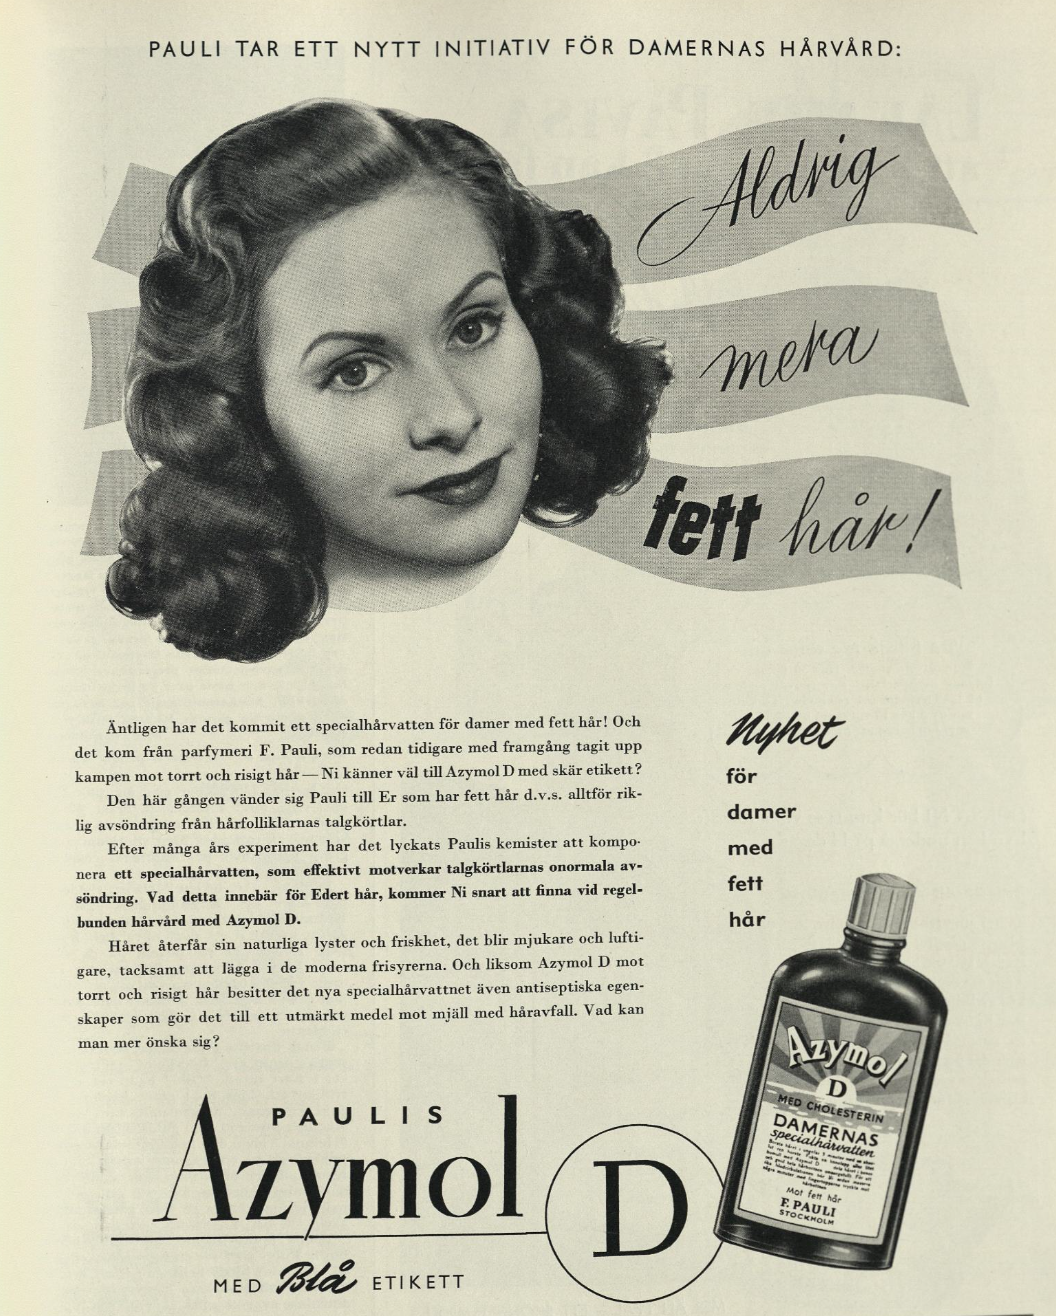

In [30]:
image

In [35]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

# generated_ids = model.generate(**inputs, max_length=264)
generated_ids = model.generate(**inputs, min_length=64)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
/home/adam/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (63) is larger than the maximum possible length (18). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


A woman with curly hair is used to convey the benefits of the product,”


In [15]:
dir_path = "./test_set_blip/"
for img in os.listdir(dir_path):
    if img.endswith(".png"):
        img_path = os.path.join(dir_path,img)
        image = Image.open(img_path)
        inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

        generated_ids = model.generate(**inputs)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
        
        with open("./blip200.txt", "a") as f:
            f.write(img + ": "+ generated_text + "\n")
        

The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when us